In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dt=pd.read_csv('/content/data-set for decision tree.csv')
dt

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [7]:
dt.replace('?', np.nan, inplace=True)
print(dt)

      workclass     education      marital.status         occupation  \
0           NaN       HS-grad             Widowed                NaN   
1       Private       HS-grad             Widowed    Exec-managerial   
2           NaN  Some-college             Widowed                NaN   
3       Private       7th-8th            Divorced  Machine-op-inspct   
4       Private  Some-college           Separated     Prof-specialty   
...         ...           ...                 ...                ...   
32556   Private  Some-college       Never-married    Protective-serv   
32557   Private    Assoc-acdm  Married-civ-spouse       Tech-support   
32558   Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
32559   Private       HS-grad             Widowed       Adm-clerical   
32560   Private       HS-grad       Never-married       Adm-clerical   

        relationship   race     sex native.country income  
0      Not-in-family  White  Female  United-States  <=50K  
1      Not-in-f

In [6]:
dt.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [8]:
dt.isnull().sum()

,0
workclass,1836
education,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0
native.country,583
income,0


In [9]:
dt['workclass'].fillna(dt['workclass'].mode()[0],inplace=True)
dt['occupation'].fillna(dt['occupation'].mode()[0],inplace=True)
dt['native.country'].fillna(dt['native.country'].mode()[0],inplace=True)

<ipython-input-9-b9d4d8b83be1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['workclass'].fillna(dt['workclass'].mode()[0],inplace=True)
<ipython-input-9-b9d4d8b83be1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [10]:
dt.isnull().sum()

,0
workclass,0
education,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
native.country,0
income,0


In [11]:
label_encoder = LabelEncoder()
dt['workclass'] = label_encoder.fit_transform(dt['workclass'])
dt['education'] = label_encoder.fit_transform(dt['education'])
dt['marital.status'] = label_encoder.fit_transform(dt['marital.status'])
dt['occupation'] = label_encoder.fit_transform(dt['occupation'])
dt['relationship']=label_encoder.fit_transform(dt['relationship'])
dt['race']=label_encoder.fit_transform(dt['race'])
dt['sex']=label_encoder.fit_transform(dt['sex'])
dt['native.country']=label_encoder.fit_transform(dt['native.country'])

In [12]:
X = dt.drop('income', axis=1)
y = dt['income']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
classification = DecisionTreeClassifier(random_state=42)
classification.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = classification.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)

In [17]:
accuracy

0.8113004759711346

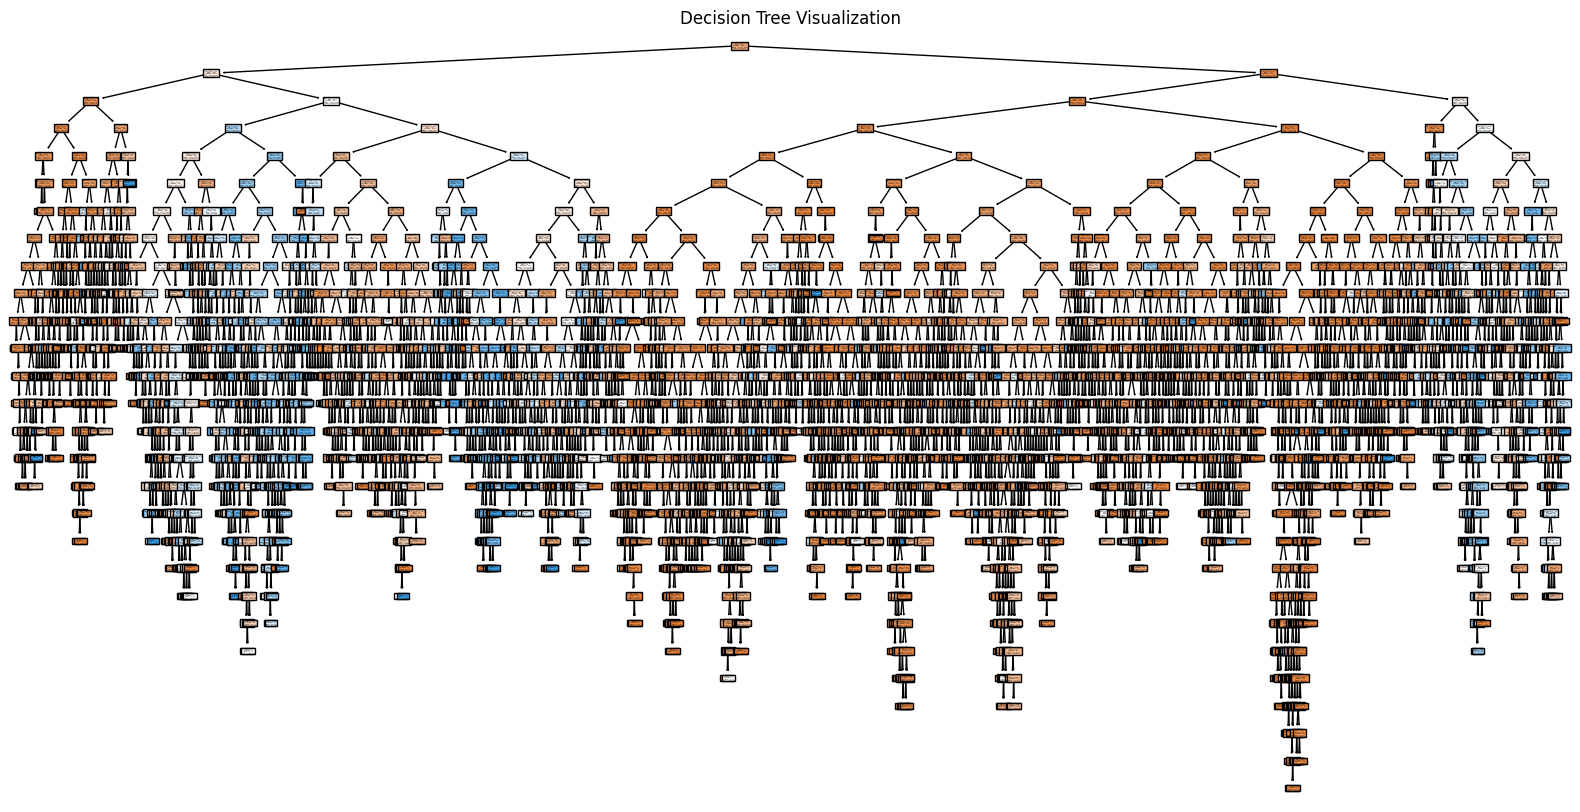

In [19]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    classification,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()